# Library

In [1]:
import zipfile
import os
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load Data dari Kaggle

In [2]:
!pip install kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kristinwulandari","key":"2d0e6b18219774fa204032f9f91b6c12"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d roopacalistus/superstore

Dataset URL: https://www.kaggle.com/datasets/roopacalistus/superstore
License(s): GNU Lesser General Public License 3.0
  0% 0.00/164k [00:00<?, ?B/s]
100% 164k/164k [00:00<00:00, 59.9MB/s]


In [6]:
# Ekstrak file ZIP
with zipfile.ZipFile("superstore.zip", "r") as zip_ref:
    zip_ref.extractall("superstore_data")

os.listdir("superstore_data")

['SampleSuperstore.csv']

In [7]:
df = pd.read_csv("superstore_data/SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Augmentasi Duplikasi

In [8]:
# Hitung jumlah baris yang perlu ditambahkan
rows_needed = 10000 - len(df)

# Gandakan beberapa baris dataset
additional_data = df.sample(rows_needed, replace=True)

# Gabungkan data asli dengan data tambahan
augmented_df = pd.concat([df, additional_data], ignore_index=True)

# Verifikasi jumlah baris
print("Jumlah baris setelah augmentasi:", len(augmented_df))

Jumlah baris setelah augmentasi: 10000


In [9]:
augmented_df.to_csv("Augmented_Superstore.csv", index=False)

In [10]:
df = pd.read_csv("Augmented_Superstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Standard Class,Consumer,United States,Hollywood,Florida,33021,South,Furniture,Furnishings,337.0880,4,0.20,16.8544
9996,Standard Class,Home Office,United States,San Diego,California,92037,West,Furniture,Chairs,2676.6720,9,0.20,267.6672
9997,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,49.4400,3,0.00,24.2256
9998,First Class,Consumer,United States,Milwaukee,Wisconsin,53209,Central,Furniture,Furnishings,34.7900,7,0.00,10.7849


# EDA

In [11]:
df.describe()
df.describe(include=['object'])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5972,5195,10000,915,2002,3205,6028,1525


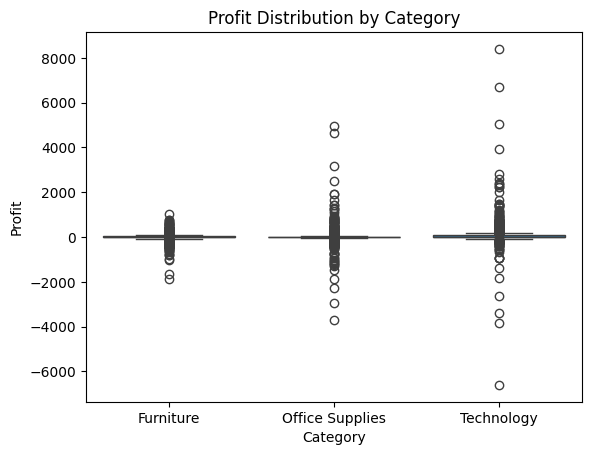

In [12]:
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.show()

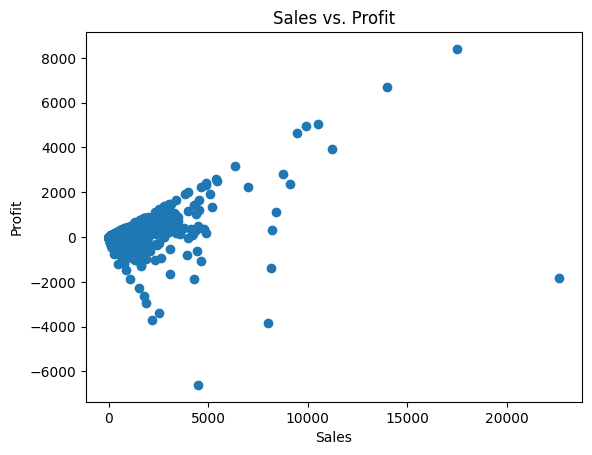

In [13]:
plt.scatter(df['Sales'], df['Profit'])
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

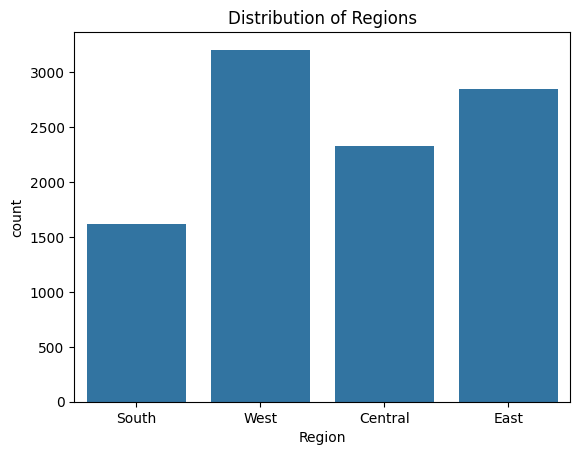

In [14]:
sns.countplot(x='Region', data=df)
plt.title('Distribution of Regions')
plt.show()

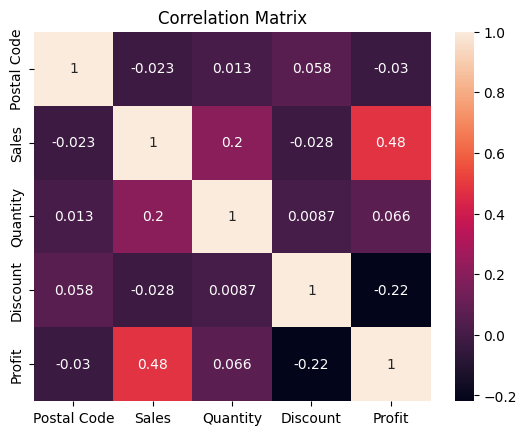

In [15]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [16]:
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [17]:
# Fitur dan Target
X = df.drop(columns=['Profit'])
y = (df['Profit'] > 0).astype(int)

In [18]:
# Kolom kategorikal dan numerik
categorical_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
numerical_cols = ['Sales', 'Quantity', 'Discount']

In [19]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

In [20]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Konversi target menjadi format yang sesuai untuk klasifikasi
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [21]:
# EarlyStopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model

## Feedforward Neural Network

In [22]:
# Model Feedforward Neural Network (FFNN)
model_ffnn = Sequential()
model_ffnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ffnn.add(Dropout(0.3))
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dense(2, activation='softmax'))

# Compile model
model_ffnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with EarlyStopping
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8457 - loss: 0.3148 - val_accuracy: 0.9415 - val_loss: 0.1415
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9375 - loss: 0.1411 - val_accuracy: 0.9415 - val_loss: 0.1290
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9361 - loss: 0.1433 - val_accuracy: 0.9385 - val_loss: 0.1340
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9394 - loss: 0.1301 - val_accuracy: 0.9410 - val_loss: 0.1337
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9464 - loss: 0.1145 - val_accuracy: 0.9445 - val_loss: 0.1244
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9393 - loss: 0.1239 - val_accuracy: 0.9425 - val_loss: 0.1198
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9455 - loss: 0.1208 - val_accuracy: 0.9430 - val_loss: 0.1316
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9459 - loss: 0.1144 - val_accuracy: 0

In [23]:
# Prediksi model FFNN
predictions_ffnn = model_ffnn.predict(X_test)
predictions_ffnn = np.argmax(predictions_ffnn, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [24]:
# Classification Report untuk FFNN
print("FFNN Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predictions_ffnn))

FFNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       361
           1       0.96      0.98      0.97      1639

    accuracy                           0.95      2000
   macro avg       0.92      0.89      0.90      2000
weighted avg       0.94      0.95      0.94      2000



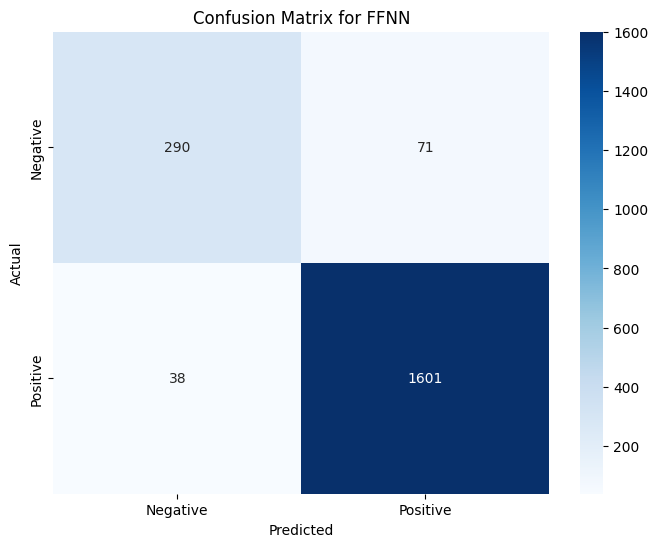

In [34]:
cm_ffnn = confusion_matrix(np.argmax(y_test, axis=1), predictions_ffnn)

# Confusion Matrix FFNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ffnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for FFNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

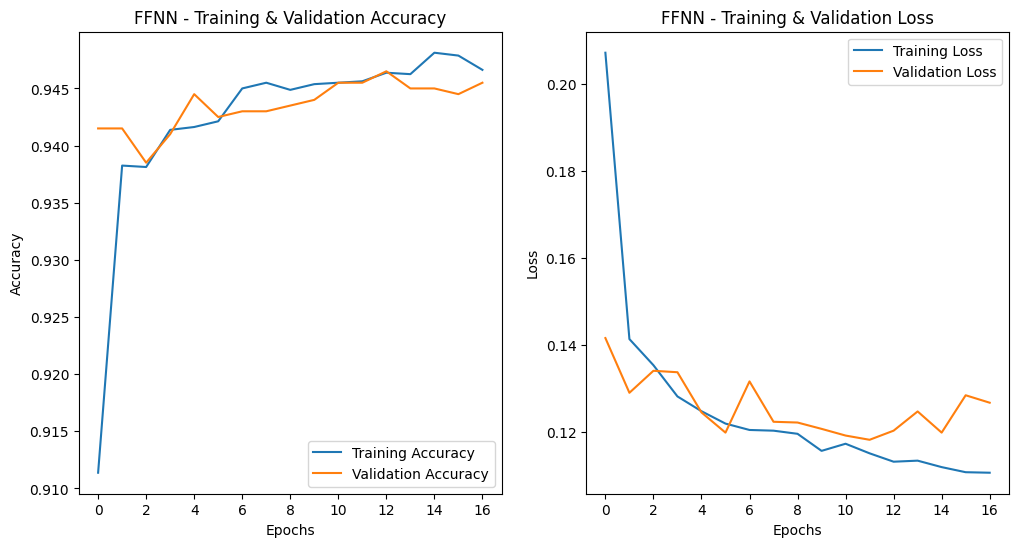

In [25]:
# Plotting untuk Model FFNN
plt.figure(figsize=(12, 6))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_ffnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('FFNN - Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_ffnn.history['loss'], label='Training Loss')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss')
plt.title('FFNN - Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Deep Neural Network (DNN)

In [26]:
# Model Deep Neural Network (DNN)
model_dnn = Sequential()
model_dnn.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(2, activation='softmax'))

# Compile the model
model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with EarlyStopping
history_dnn = model_dnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9099 - loss: 0.2280 - val_accuracy: 0.9360 - val_loss: 0.1526
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9347 - loss: 0.1403 - val_accuracy: 0.9425 - val_loss: 0.1383
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9476 - loss: 0.1229 - val_accuracy: 0.9420 - val_loss: 0.1262
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9423 - loss: 0.1248 - val_accuracy: 0.9395 - val_loss: 0.1341
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9421 - loss: 0.1239 - val_accuracy: 0.9420 - val_loss: 0.1291


In [27]:
# Prediksi model DNN
predictions_dnn = model_dnn.predict(X_test)
predictions_dnn = np.argmax(predictions_dnn, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [28]:
# Classification Report untuk DNN
print("DNN Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predictions_dnn))

DNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       361
           1       0.96      0.97      0.96      1639

    accuracy                           0.94      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.93      0.94      0.94      2000



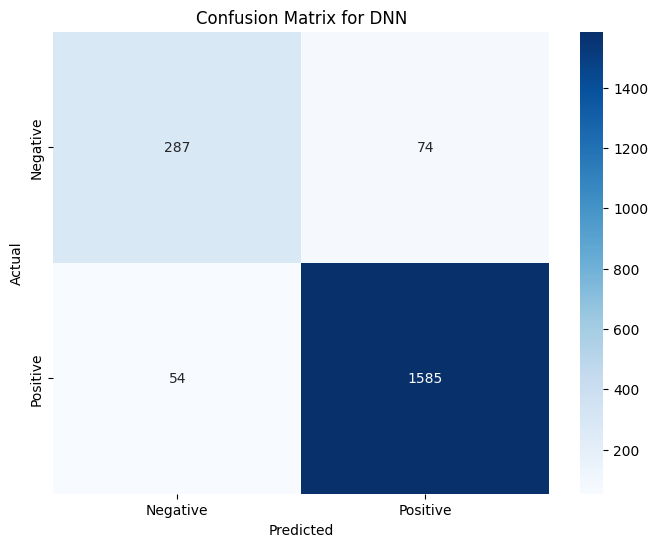

In [35]:
cm_dnn = confusion_matrix(np.argmax(y_test, axis=1), predictions_dnn)

# Confusion Matrix DNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for DNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

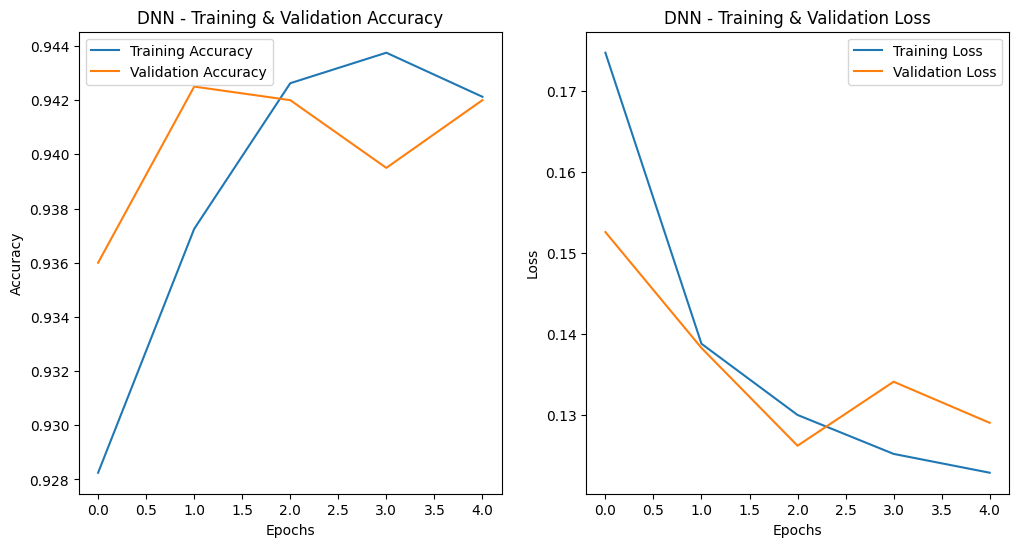

In [29]:
# Plotting untuk Model DNN
plt.figure(figsize=(12, 6))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN - Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('DNN - Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Prediksi

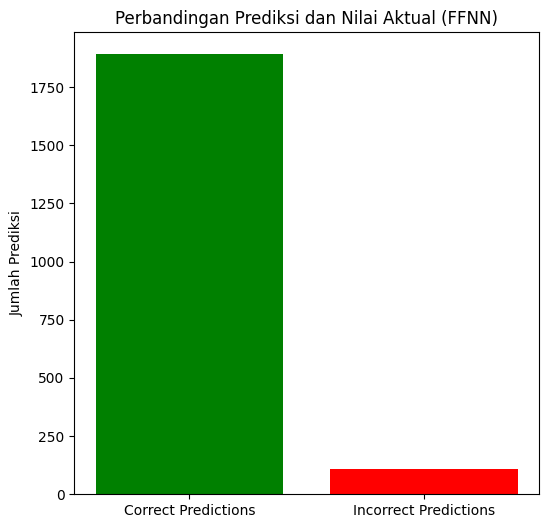

In [36]:
# Membandingkan prediksi dengan nilai aktual
actual_values = np.argmax(y_test, axis=1)

# Menghitung jumlah prediksi yang benar dan salah
correct_predictions = np.sum(predictions_ffnn == actual_values)
incorrect_predictions = np.sum(predictions_ffnn != actual_values)

# Visualisasi perbandingan
plt.figure(figsize=(6, 6))
plt.bar(["Correct Predictions", "Incorrect Predictions"], [correct_predictions, incorrect_predictions], color=['green', 'red'])
plt.title('Perbandingan Prediksi dan Nilai Aktual (FFNN)')
plt.ylabel('Jumlah Prediksi')
plt.show()

# Test Model untuk Prediksi

In [44]:
new_data = pd.DataFrame({
    'Sales': [500, 1200, 300, 1500, 800],
    'Quantity': [2, 4, 1, 5, 3],
    'Discount': [0.8, 0.15, 0.7, 0.05, 0.1],
    'Ship Mode': ['Standard Class', 'Second Class', 'First Class', 'Standard Class', 'Second Class'],
    'Segment': ['Consumer', 'Corporate', 'Home Office', 'Consumer', 'Corporate'],
    'Region': ['West', 'East', 'Central', 'West', 'East'],
    'Category': ['Furniture', 'Office Supplies', 'Technology', 'Furniture', 'Technology'],
    'Sub-Category': ['Chairs', 'Binders', 'Phones', 'Tables', 'Bookcases']
})

new_data_preprocessed = preprocessor.transform(new_data)

In [45]:
# Prediksi dengan model FFNN
predictions_ffnn = model_ffnn.predict(new_data_preprocessed)
predicted_classes_ffnn = np.argmax(predictions_ffnn, axis=1)

print("Prediksi Profit (FFNN):")
for i, pred in enumerate(predicted_classes_ffnn):
    print(f"Data {i+1}: {'Profit' if pred == 1 else 'No Profit'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediksi Profit (FFNN):
Data 1: No Profit
Data 2: Profit
Data 3: No Profit
Data 4: Profit
Data 5: Profit


In [46]:
# Prediksi dengan model DNN
predictions_dnn = model_dnn.predict(new_data_preprocessed)
predicted_classes_dnn = np.argmax(predictions_dnn, axis=1)

print("Prediksi Profit (DNN):")
for i, pred in enumerate(predicted_classes_dnn):
    print(f"Data {i+1}: {'Profit' if pred == 1 else 'No Profit'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediksi Profit (DNN):
Data 1: No Profit
Data 2: Profit
Data 3: No Profit
Data 4: Profit
Data 5: Profit
